<a href="https://colab.research.google.com/github/ygsharma/ml-assignments/blob/main/assignment-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.io

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = scipy.io.loadmat('/content/drive/MyDrive/Homework 2 attached files Sep 21, 2022 717 PM/data3.mat')
df = data.get('data')

In [21]:
x = df[:,0:2]
y = df[:,2]

In [33]:
x.shape
y.shape

(200,)

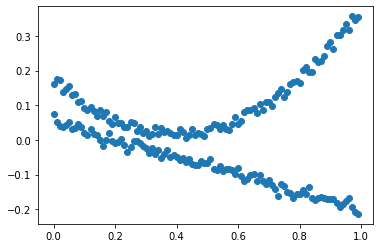

In [81]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1]);
plt.show();

In [10]:
def cerror(x,y,theta):
  return y-(np.dot(theta, x.T));

In [11]:
def perror(x,y,theta):
  return (-1/(len(x))*(y*np.dot(theta, x.T)));

In [82]:
def plot_boundary(theta, x, y):
  plt.figure(0)
  n = x.shape[0]

  min_x = min(x[:, 0]);
  max_x = max(x[:, 0]);
  min_y = (-theta[2] - theta[0]*min_x)/theta[1];
  max_y = (-theta[2] - theta[0]*max_x)/theta[1];

  
  plt.plot(x[:,0], x[:,1], 'r.')

  plt.plot([min_x, max_x], [min_y, max_y], '-b');
  plt.xlabel('X1');
  plt.ylabel('X2');
  plt.show();

In [83]:
def perceptron(x, y, tolerance, alpha):

  bias = np.ones((x.shape[0],1));
  x_new = np.append(x, bias, axis=1);
  theta = np.random.rand(x_new.shape[1]);

  
  n = len(x);
  iter = 0;
  l = [];
  max_iter = 20000;
  closs, ploss = [], [];
  while(iter < max_iter):
    
    cerr, perr = 0,0;
    for i in range(0, len(x)):
      if(y[i]*np.dot(x_new[i].T, theta) < 0):
        theta += y[i]*x_new[i];
        cerr += np.linalg.norm(cerror(x_new[i],y[i],theta));
        perr += np.linalg.norm(perror(x_new[i],y[i],theta))
    
    closs.append(cerr/n);
    ploss.append(perr/n);

    # xv = np.array(xv);
    # yv = np.array(yv);
    # theta += np.dot(yv, xv);
    
    # print(np.linalg.norm(np.dot(yv, xv)));
    
    l.append(iter);
    iter += 1;

    if(perr/n < tolerance):
      print(iter);
      break;

  return theta, closs, ploss, l;


In [84]:
theta, closs, ploss, l = perceptron(x,y,0.001,0.1);

62


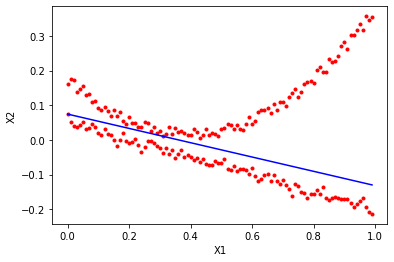

In [85]:
plot_boundary(theta, x, y);

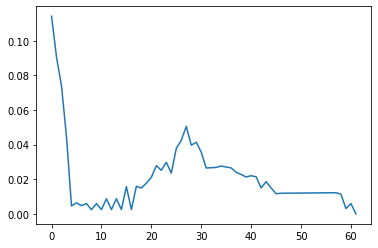

In [86]:
plt.plot(l, ploss);
plt.show();

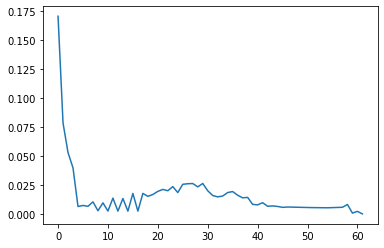

In [87]:
plt.plot(l, closs);